In [38]:
import matplotlib.pyplot as plt
import pathlib
import numpy as np
from utils import read_im, save_im, normalize
output_dir = pathlib.Path("image_solutions")
output_dir.mkdir(exist_ok=True)

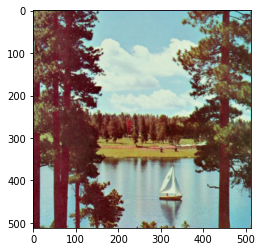

In [39]:
im = read_im(pathlib.Path("images", "lake.jpg"))
plt.imshow(im)

In [40]:
from operator import index


def convolve_im(im, kernel,
    ):
    """ A function that convolves im with kernel
    
    Args:
        im ([type]): [np.array of shape [H, W, 3]]
        kernel ([type]): [np.array of shape [K, K]]
    
    Returns:
        [type]: [np.array of shape [H, W, 3]. should be same as im]
    """


    assert len(im.shape) == 3

    new_img = np.zeros(im.shape)
    f_kernel = np.flipud(np.fliplr(kernel))
    kernel_size=f_kernel.shape[0]
    for h in range(im.shape[0]):
        for w in range(im.shape[1]):
            for color in range(im.shape[2]):


                mat = im[h:h+kernel_size, w:w+kernel_size, color]
                for h_mat in range(mat.shape[0]):
                    for w_mat in range(mat.shape[1]):
                        new_img[h, w, color] += mat[h_mat, w_mat] * (f_kernel[h_mat, w_mat])
    
    im = new_img



    return im

In [41]:
# Define the convolutional kernels
h_b = 1 / 256  * np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
])
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Convolve images
im_smoothed = convolve_im(im.copy(), h_b)
save_im(output_dir.joinpath("im_smoothed.jpg"), im_smoothed)
im_sobel = convolve_im(im, sobel_x)
save_im(output_dir.joinpath("im_sobel.jpg"), im_sobel)

# DO NOT CHANGE. Checking that your function returns as expected
assert isinstance(im_smoothed, np.ndarray),     f"Your convolve function has to return a np.array. " +    f"Was: {type(im_smoothed)}"
assert im_smoothed.shape == im.shape,     f"Expected smoothed im ({im_smoothed.shape}" +     f"to have same shape as im ({im.shape})"
assert im_sobel.shape == im.shape,     f"Expected smoothed im ({im_sobel.shape}" +     f"to have same shape as im ({im.shape})"

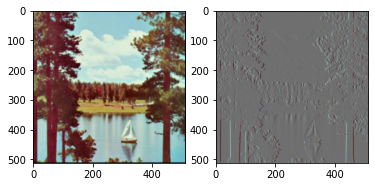

In [42]:
plt.subplot(1, 2, 1)
plt.imshow(normalize(im_smoothed))

plt.subplot(1, 2, 2)
plt.imshow(normalize(im_sobel))
plt.show()